In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
import IPython
from pathlib import Path
import sys
NBK_DIR = IPython.extract_module_locals()[1]["_dh"][0]
image_directory = NBK_DIR.parent/'data_for_ml'/'original'
image_directory

PosixPath('/Users/ryantenbarge/code/sstollunderwood/solar_potential_map/data_for_ml/original')

In [3]:
ls = os.listdir(image_directory)
ls.sort(key=int)
ls

ValueError: invalid literal for int() with base 10: '3975.png'

In [4]:
len(os.listdir(image_directory))

7200

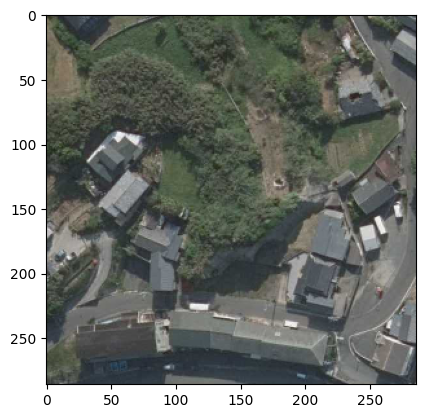

In [5]:
img = cv2.imread('/Users/ryantenbarge/code/sstollunderwood/solar_potential_map/data_for_ml/original/3975.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
avg = np.mean(img, axis=(0,1))
avg

array([88.68143919, 93.24004841, 86.72217468])

In [7]:
std = np.std(img, axis=(0,1))
std

array([32.80964997, 30.3758076 , 30.7497923 ])

In [13]:
total_average = np.array([0.0, 0.0, 0.0])
total_std = np.array([0.0, 0.0, 0.0])
for picture in os.listdir(image_directory):
    img = cv2.imread(f"/Users/ryantenbarge/code/sstollunderwood/solar_potential_map/data_for_ml/original/{picture}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    avg = np.mean(img, axis=(0,1))
    total_average += avg
    std = np.std(img, axis=(0,1))
    total_std += std

total_average = total_average/7200
total_std = total_std/7200


In [46]:
total_average

array([119.27211492, 125.43755068, 116.00410304])

In [36]:
mean_color = np.ones((20, 20, 3))
mean_color = mean_color * total_average
mean_color.shape

(20, 20, 3)

In [15]:
total_std

array([37.22976657, 33.73075781, 32.75369858])

Text(0.5, 1.0, 'Average Color of All Images')

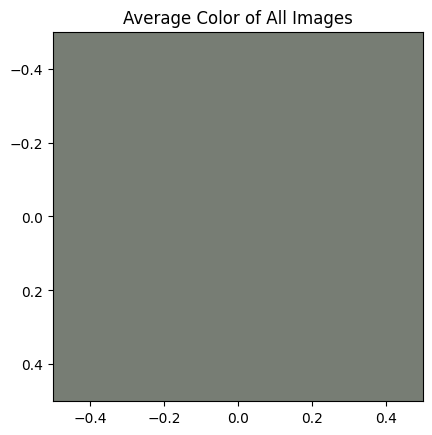

In [51]:
plt.imshow(total_average.reshape(1,1,3)/255)
plt.title('Average Color of All Images')

In [53]:
print(f"Average color: {total_average}   Standard Dev: {total_std}")

Average color: [119.27211492 125.43755068 116.00410304]   Standard Dev: [37.22976657 33.73075781 32.75369858]
